# **Лабораторная работа №7. Визуализация в решении исследовательских и научных задач.**

In [ ]:
!pip install ChernoffFace

In [ ]:
import math
import statistics as stat
import scipy.stats as ss

import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.cm
import pylab as pl
from ChernoffFace import *

import missingno as msno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Часть 1**

## 1. ПЕВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

**1. Загрузите датасет. Укажите тип переменных**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Fish.csv')

In [ ]:
df1.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Описание данных**

Всего в наборе данных 159 строк и 7 признаков
. Целевая переменная - 'Вес'.

| Название колонки | Подробности
| ------------|--------------
| Species | Вид рыбы
| Weight | Вес рыбы в граммах
| Length1 | Вертикальная длина в CM
| Length2 | Диагональная длина в СМ
| Length3 | Поперечная длина рыбы в СМ
| Height | Высота в СМ
| Width | Диагональная ширина в СМ

Категориальные признаки: Species.

Количественные: Weight, Length1, Length2, Length3, Height, Width.

**2. Выведите описательную статистику для переменных датасета**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Исключим данные с рыбами весом менее 1 гр.

In [ ]:
df1 = df1[df1['Weight'] >= 1]

**3. Используя визуализацию, покажите, сколько различных видов рыб включает ваш набор данных. Используйте интерактивную визуализацию**

In [ ]:
sns.set_style("darkgrid")
colors = px.colors.qualitative.Plotly[:7]
Species1 = df1['Species'].value_counts()

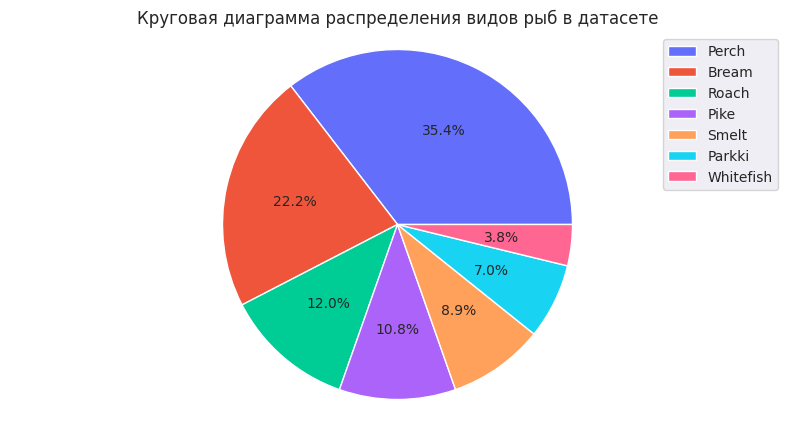

In [ ]:
# Круговая диаграмма
vals = Species1
labels = Species1.index
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(vals, autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.legend(labels=labels)
plt.title('Круговая диаграмма распределения видов рыб в датасете')
plt.show()

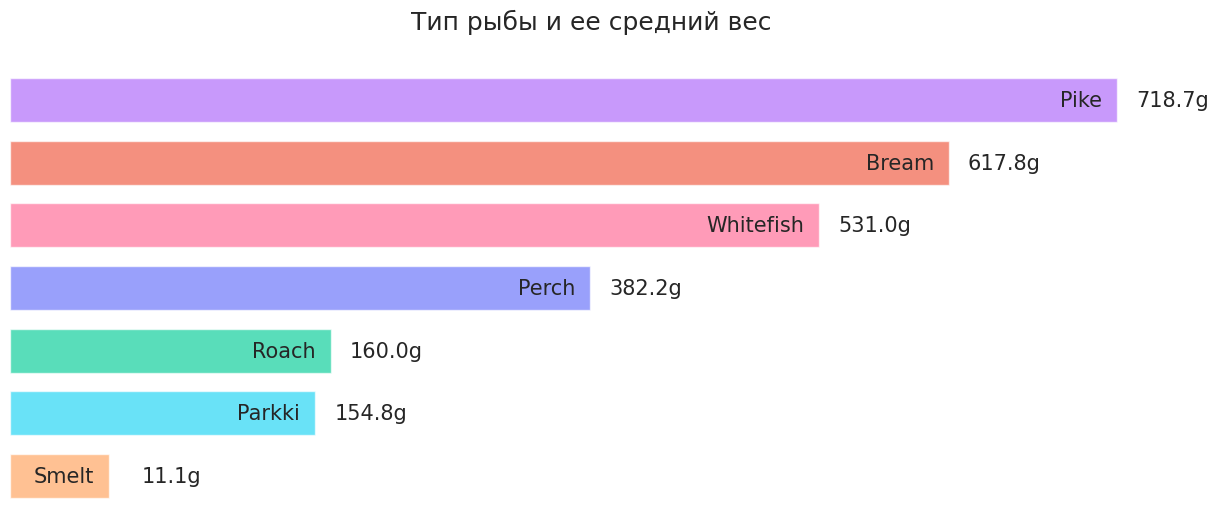

In [ ]:
#@title
fish = ['Pike','Bream','Whitefish','Perch','Roach','Parkki','Smelt']
Weights = [14.5, 12.3, 10.6, 7.6, 4.2, 4, 1.3]

fig = plt.figure(figsize=(15,6))
plt.barh(width=Weights, y=fish, height=0.7, color=['#AB63FA', '#EF553B','#FF6692','#636EFA','#00CC96', '#19D3F3', '#FFA15A'], alpha=0.65)

s = ['718.7g', '617.8g', '531.0g', '382.2g', '160.0g', '154.8g', '11.1g']
x = [15.7, 13.5, 11.8, 8.8, 5.4, 5.2, 2.5]
y = [0,1,2,3,4,5,6]

s1 = ['Pike','Bream','Whitefish','Perch','Roach','Parkki','Smelt']
x1 = [14.3, 12.1, 10.4, 7.4, 4.0, 3.8, 1.1]
y1 = [0,1,2,3,4,5,6]


for i in range(7):
    plt.text(s = s[i], x=x[i], y=y[i] , fontsize=15,va='center',ha='right')
    plt.text(s = s1[i], x=x1[i], y=y1[i], fontsize=15,va='center',ha='right')

plt.title("Тип рыбы и ее средний вес", fontsize=18, pad=20)
plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

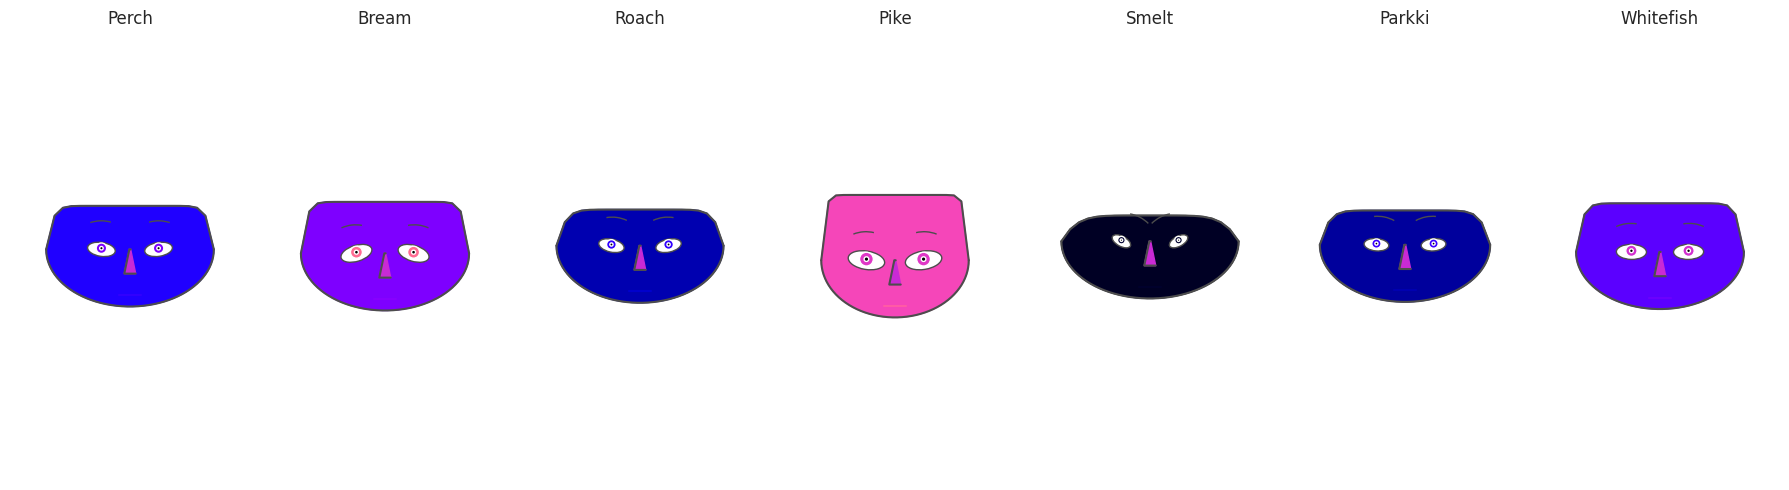

In [ ]:
# Лица Чернова
Species2 = pd.DataFrame(df1['Species'])
Species2[['Weight','Length1','Length2','Length3','Height','Width']] = variables_rescale(df1[['Weight','Length1','Length2','Length3','Height','Width']])

df_spec = Species2.groupby(['Species']).mean().reset_index()
d = {0:1, 1:5, 2:0, 3:3, 4:2, 5:4, 6:6}
df_spec = df_spec.rename(d).sort_index()

fig = chernoff_face(data=df_spec,
                    n_columns=7,
                    long_face=False,
                    color_mapper=matplotlib.cm.gnuplot2,
                    figsize=(18, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

**4. Исследуйте, есть ли какие-либо зависимые переменные**


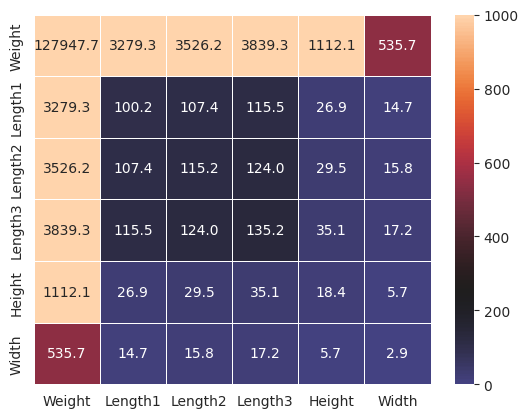

In [ ]:
# Ковариационная матрица
sns.heatmap(df1.cov(), annot=True, fmt=".1f", linewidths=0.5, linecolor='white', vmin=0, vmax=1000, center=250)
plt.show()

**Выборочная ковариация** — это мера, которая количественно определяет силу и направление взаимосвязи между парой переменных:

* Если корреляция положительная, то и ковариация тоже положительная. Более сильное отношение соответствует более высокой ценности ковариации.
* Если корреляция отрицательна, то и ковариация также отрицательна. Более сильное отношение соответствует более низкому (или более высокому абсолютному) значению ковариации.
* Если корреляция слабая, то ковариация близка к нулю.

Значения по диагоналям матрицы — это дисперсии каждого признака.

<Axes: >

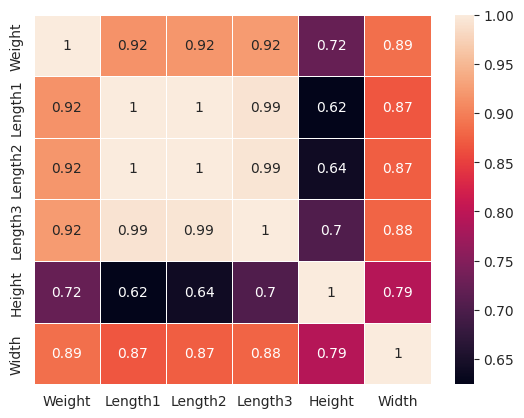

In [ ]:
# Корреляционная матрица
sns.heatmap(df1.corr(), annot = True, linewidths=0.5, linecolor='white')

**Коэффициент корреляции**. К нему надо относиться как к стандартизированной ковариации.
* cor > 0 указывает на положительную корреляцию.
* cor < 0 указывает на отрицательную корреляцию.
* cor = 1 полная линейная зависимость между переменными.
* r = −1 полное отсутствие линейной зависимости.
* r ≈ 0 корреляция между переменными отсутствует.

Видим высокую положительную корреляцию практически между всеми признаками.
Признаки

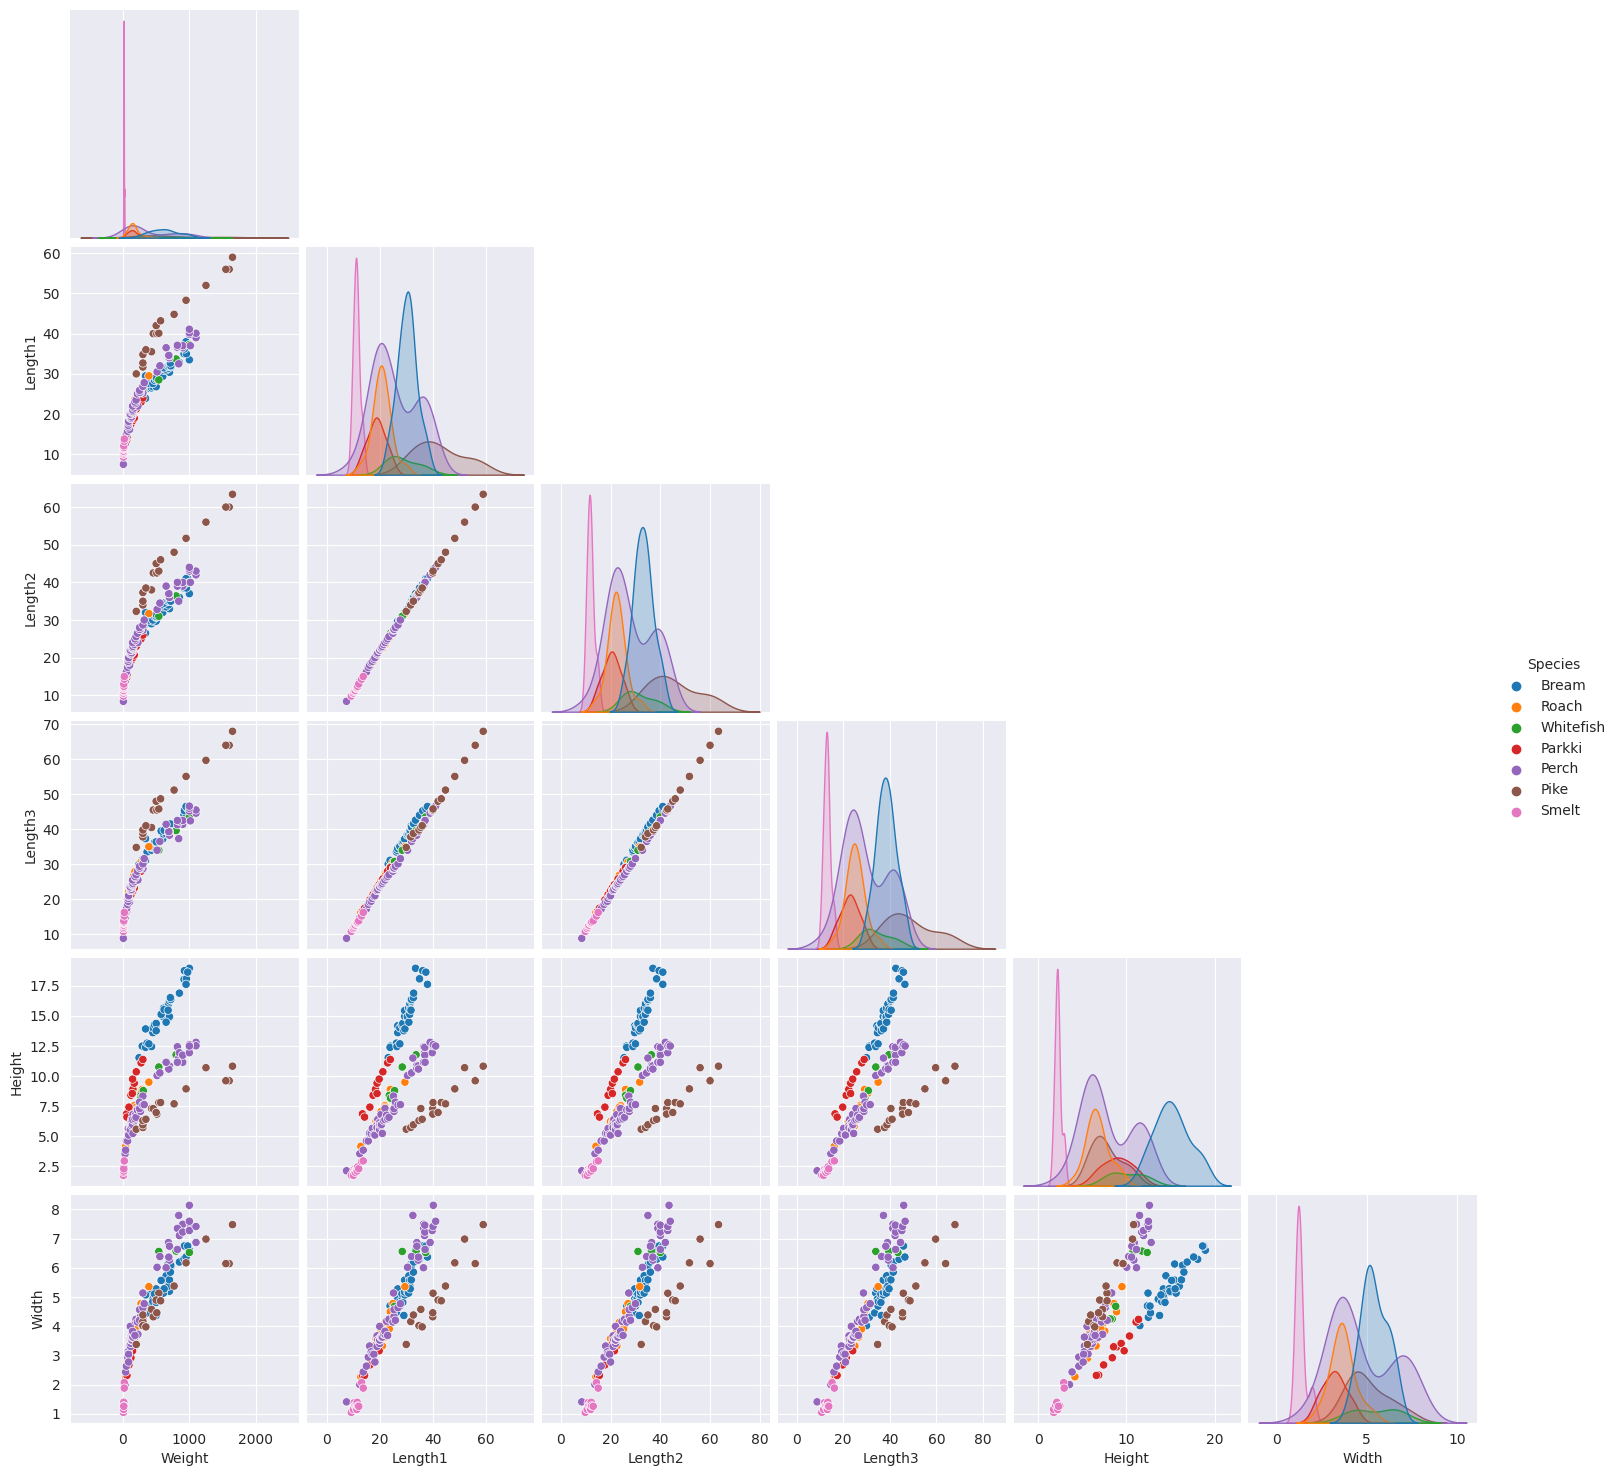

In [ ]:
sns.pairplot(df1, hue = "Species", corner=True)

Наблюдаем линейную зависимость между предикторами для каждого вида рыб. Также видим, что целевая переменная Weight имеет с остальными логарифмическую зависимость.

**5. Определите тип распределения количественных переменных**

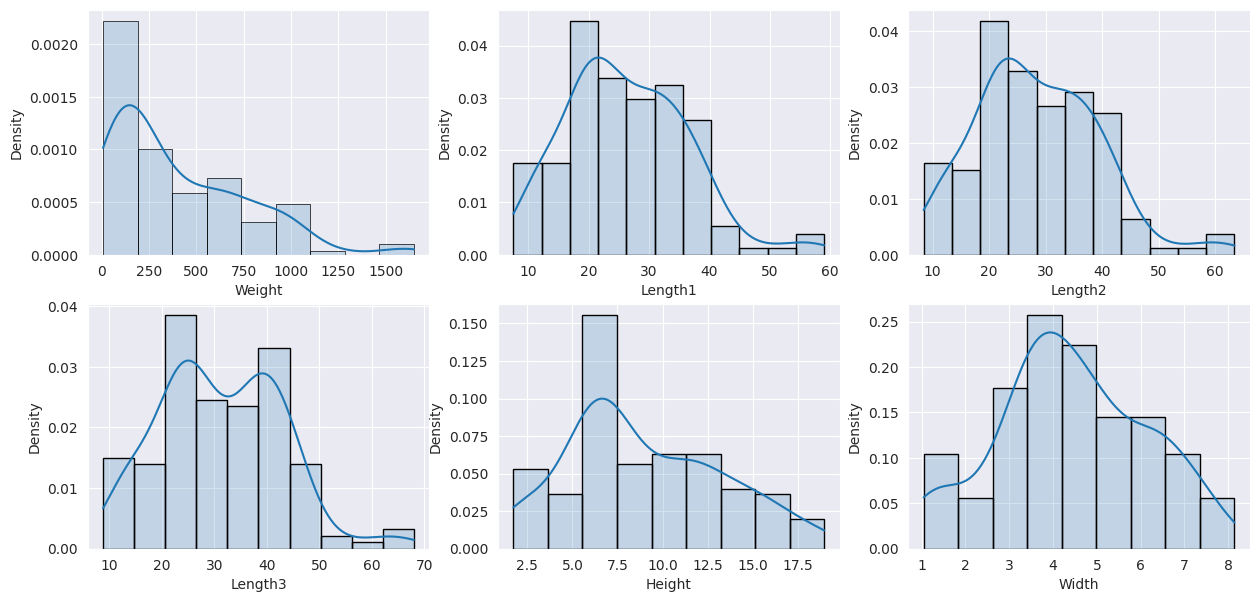

In [ ]:
#@title
# Гистограммы
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 7))

sns.histplot(data=df1['Weight'], alpha = 0.2, edgecolor='k',
         linewidth=0.5,kde=True,stat="density", ax=axs[0,0])

sns.histplot(data=df1['Length1'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[0,1])

sns.histplot(data=df1['Length2'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[0,2])

sns.histplot(data=df1['Length3'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,0])

sns.histplot(data=df1['Height'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,1])

sns.histplot(data=df1['Width'],alpha = 0.2, edgecolor='k',
         linewidth=1,kde=True,stat="density", ax=axs[1,2])

plt.show()

Все распределения ассиметричны, ненормальны. Распредеелние признака Weight приближенно к экспоненциальному.

In [ ]:
# Интерактивная гистограмма по видам рыб
fig = px.histogram(df1, x='Width', color='Species', barmode='group')
fig.show()

**6. Существуют ли в этом наборе данных аномальные
наблюдения?**

Выбросами посчитали данные о рыбах весом менее 1 гр, они были удалены в пункте 1.

Можем взглянуть на предполгаемые выбросы с помощью боксплотов.

In [ ]:
# Интерактивный боксплот с распределением весов
box = []
for i in Species1.index:
  box.append(go.Box(y=df1[df1['Species']==i].Length3, name=str(i)))
iplot(box)

Выбросы для всех признаков присутствовали только у видов Roach и Smelt, но их значения трудно назвать аномальными.

**7. Проверьте данные на наличие пропущенных
значений**

<Axes: >

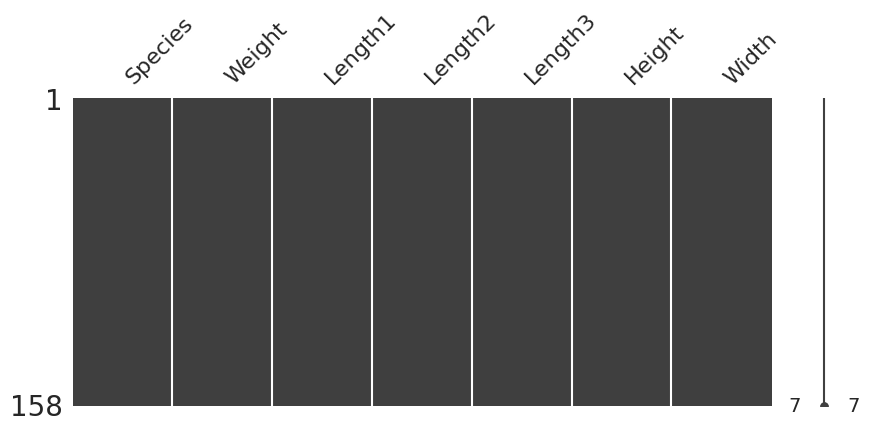

In [ ]:
msno.matrix(df1, figsize=(10, 4))

**8. Используя знания, полученные в ходе выполнения
лабораторной работы № 2, реализуйте
визуализацию многомерных данных**

In [ ]:
# Кривые Эндрюса
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    curve.append(x1+x2+x3+x4)
  return curve

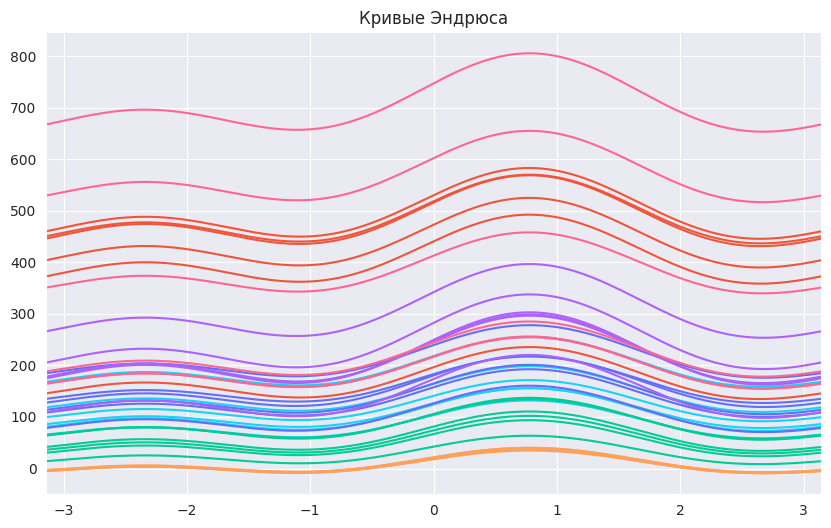

In [ ]:
#@title
species_sort = df1.sort_values(by=['Species'])
species_sort = species_sort.drop(['Species'], axis='columns')
arr = np.array(species_sort)

accuracy = 1000
samples = arr
theta = np.linspace(-np.pi, np.pi, accuracy)
pl.subplots(figsize=(10, 6))

for s in samples[:6]: # Bream
  pl.plot(theta, andrews_curve(s, theta), label='Bream', color='#EF553B')

for s in samples[35:41]: # Parkki
  pl.plot(theta, andrews_curve(s ,theta), label='Parkki', color='#19D3F3')

for s in samples[46:52]: # Perch
  pl.plot(theta, andrews_curve(s, theta), label='Perch', color='#636EFA')

for s in samples[102:108]: # Pike
  pl.plot(theta, andrews_curve(s, theta), label='Pike', color='#AB63FA')

for s in samples[119:125]: # Roach
  pl.plot(theta, andrews_curve(s, theta), label='Roach', color='#00CC96')

for s in samples[138:144]: # Smelt
  pl.plot(theta, andrews_curve(s, theta), label='Smelt', color='#FFA15A')

for s in samples[152:158]: # Whitefish
  pl.plot(theta, andrews_curve(s, theta), label='Whitefish', color='#FF6692')

pl.xlim(-np.pi,np.pi)
pl.title('Кривые Эндрюса')
# pl.legend()
pl.show()

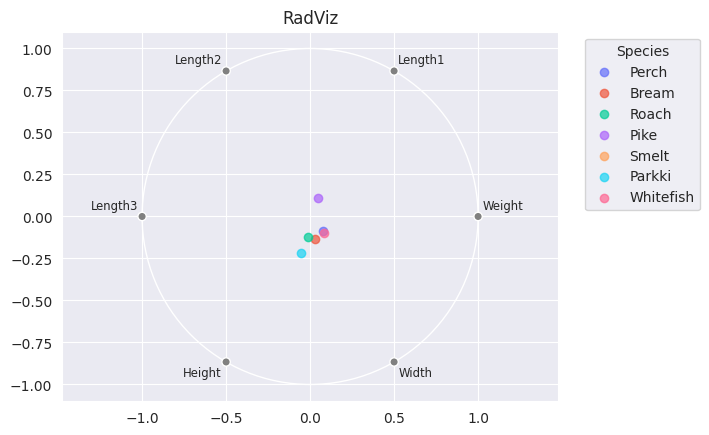

In [ ]:
# RadViz
pd.plotting.radviz(df_spec,'Species', color=colors,
                   alpha=0.7).legend(loc='upper right', title='Species', bbox_to_anchor=(1.3, 1))
plt.title('RadViz')
plt.show()

## 2. РЕГРЕССИОННЫЙ АНАЛИЗ


**9. Пусть переменная Weight (y) – независимая
(целевая) переменная. А одна из других –
зависимая (x). Постройте модель линейной
регрессии. Дайте общую оценку созданной
модели**

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
y = df1['Weight']
X = df1['Width']
X = X.to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'Ошибка на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'Ошибка на тестовых данных: {r2_score(y_test, y_test_pred)}')

Ошибка на тренировочных данных: 0.8298829034389634
Ошибка на тестовых данных: 0.686831085047603


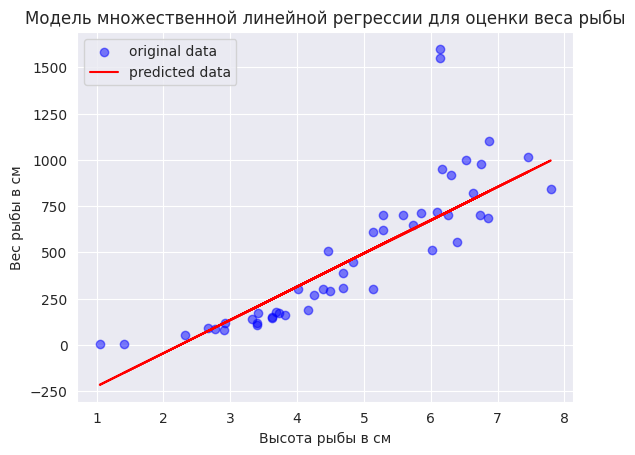

In [ ]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label = "original data")
plt.plot(X_test, y_test_pred, color='red', alpha=1, label = "predicted data")
plt.legend()
plt.xlabel('Высота рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель множественной линейной регрессии для оценки веса рыбы');

**10. Пусть переменная Weight (y) – независимая
(целевая) переменная. А все другие – зависимые
(xi). Постройте модель линейной регрессии.
Постройте график рассеяния (scatterplot) остатков
(residuals), проверьте распределение остатков на
нормальность. Дайте общую оценку созданной
модели**

In [ ]:
#@title
y = df1['Weight']
X = df1.iloc[:,2:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
# Коэффициент детерминации R2
print(f'R2 на тренировочных данных: {r2_score(y_train, y_train_pred)}')
print(f'R2 на тестовых данных: {r2_score(y_test, y_test_pred)}')

R2 на тренировочных данных: 0.8886556865744208
R2 на тестовых данных: 0.8504446106682089


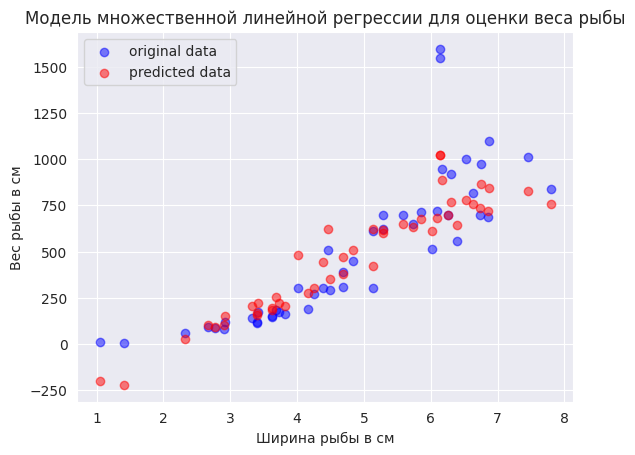

In [ ]:
plt.scatter(X_test['Width'], y_test, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_test['Width'], y_test_pred, color='red', alpha=0.5, label = "predicted data")
plt.legend()
plt.xlabel('Ширина рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель множественной линейной регрессии для оценки веса рыбы');

Очевидно, многофакторная модель намного точнее однофакторной.

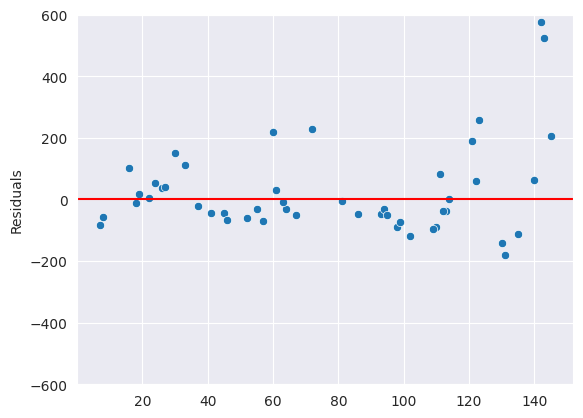

In [ ]:
residuals = y_test - y_test_pred
sns.scatterplot(residuals)
plt.axhline(y=0, color='r')
plt.ylabel('Residuals')
plt.ylim([-600,600])
plt.show()

Видим гетероскедантичность остатков.

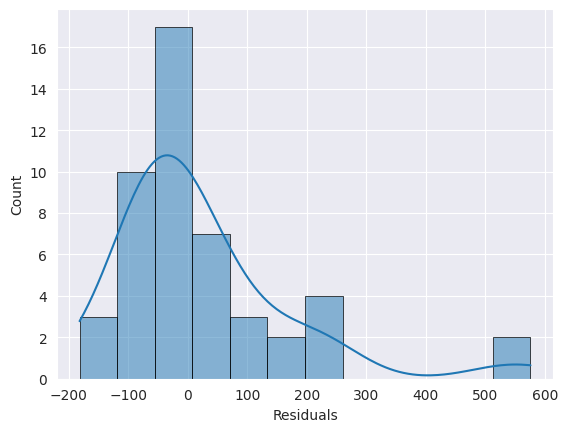

Остатки распределены ненормально.


In [ ]:
from scipy.stats import shapiro

sns.histplot(residuals, edgecolor='k', linewidth=0.5,kde=True)
plt.xlabel('Residuals')
plt.show()

stat, p = shapiro(residuals)
if p > 0.05:
    print("Остатки распределены нормально.")
else:
    print("Остатки распределены ненормально.")

**11. Найдите выбросы, наблюдения с высокой
степенью напряженности, влиятельные
наблюдения для модели, построенной в п.10.
Визуализируйте результаты**

In [ ]:
res = residuals[abs(residuals)>200]
res.index

Int64Index([123, 142, 143, 60, 145, 72], dtype='int64')

In [ ]:
y_test_drop = y_test.drop(index=[123, 142, 143, 60, 145, 72])
X_test_drop = X_test.drop(index=[123, 142, 143, 60, 145, 72])

In [ ]:
y_test_drop_pred=lr.predict(X_test_drop)
print(f'R2 на тестовых очищенных данных: {r2_score(y_test_drop, y_test_drop_pred)}')

R2 на тестовых очищенных данных: 0.9293120770119299


Коэффициент детерминации при прочих равных вырос - модель улучшила результат.

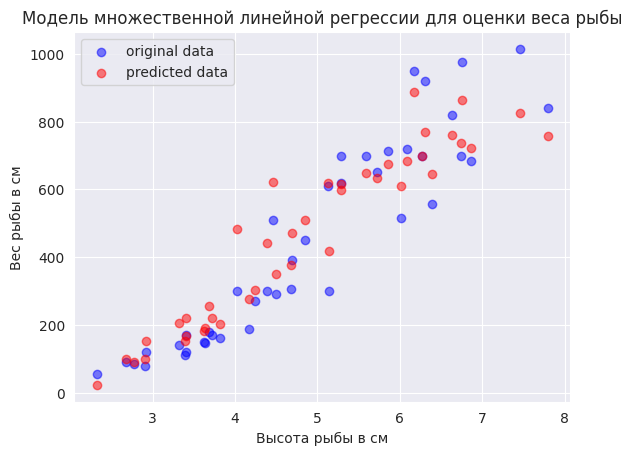

In [ ]:
plt.scatter(X_test_drop['Width'], y_test_drop, color='blue', alpha=0.5, label = "original data")
plt.scatter(X_test_drop['Width'], y_test_drop_pred, color='red', alpha=0.5, label = "predicted data")
plt.legend()
plt.xlabel('Высота рыбы в см')
plt.ylabel('Вес рыбы в см')
plt.title('Модель множественной линейной регрессии для оценки веса рыбы');

## 3. ДИСПЕРСИОННЫЙ АНАЛИЗ

**13. Выяснить на уровне значимости 5%, что вид Рыбы
зависит от всех параметров?**